# Chap_1.2
## Linear and MLP

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Data Load

In [3]:
seed=123
np.random.seed(seed)
data=2400
X = np.random.rand(data)*10

In [4]:
Y=np.sqrt(X)

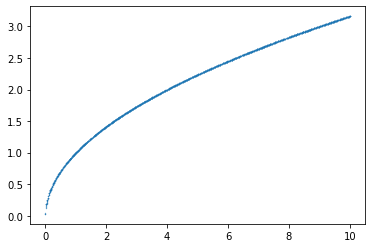

In [5]:
plt.scatter(X,Y,s=0.1)

# Chap1의 함수 활용

In [6]:
class Hypo():
    def __init__(self,w,b):
        self.w=w
        self.b=b
        
    def hypothesis(self,x):
        if self.b==False:
            return self.w*x
        else :
            return self.w*x+b
    
def cost(h,X,Y):
    err=0
    for i in range(len(X)):
        err+=(h.hypothesis(X[i])-Y[i])**2
    err=err/len(X)
    return err
def cost1(h,X,Y):
    err=0
    for i in range(len(X)):
        err+=abs(h.hypothesis(X[i])-Y[i])
    err=err/len(X)
    return err

In [7]:
def Gradient_function2(w, cost):
    b=False
    h=Hypo(w,b)
    grad = 0
    for i in range(len(X)):
        grad += 2*(h.hypothesis(X[i])- Y[i])*X[i] #앞에서 설명한 미분 X가 나와야함.
    grad = grad/ len(X)
    c = cost(h,X,Y)
    return grad, c

In [8]:
lr=0.001
w1 =4
w2 =4
list_w1=[]#weight
list_c1=[]#cost
list_w2=[]
list_c2=[]

In [9]:
for i in range(100):
    grad2, mean_cost2 = Gradient_function2(w2,cost)
    w2 -= lr*grad2
    list_w2.append(w2)
    list_c2.append(mean_cost2)

In [10]:
w2

0.3827801461274993

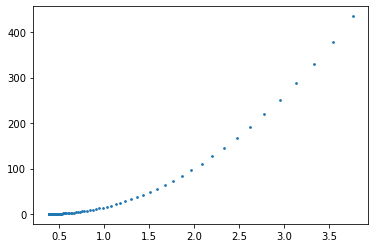

In [11]:
plt.scatter(list_w2,list_c2,s=3)

In [12]:
x=[i*0.01 for i in range(1000)]

In [13]:
x=np.array(x,dtype=np.float64)

In [14]:
y=x*w2

<function matplotlib.pyplot.show(close=None, block=None)>

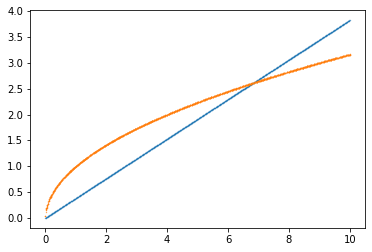

In [15]:
plt.scatter(x,y,s=0.1)
plt.scatter(X,Y,s=0.1)
plt.show

# Pytorch의 활용

In [16]:
import torch
import torch.nn as nn

class Linear(nn.Module):
    def __init__(self):
        super(Linear,self).__init__()
        self.linear=nn.Linear(in_features=1,out_features=1,bias=True)
        
    def forward(self,x):
        return self.linear(x)
    
class MLP(nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        self.linear1 = nn.Linear(in_features=1,out_features=200,bias=True)
        self.linear2 = nn.Linear(in_features=200,out_features=1,bias=True)
        self.relu=nn.Sigmoid()
        
    def forward(self,x):
        x=self.linear1(x)
        x=self.relu(x)
        x=self.linear2(x)
        return x

In [17]:
model2=MLP()

In [18]:
for name, param in model2.named_parameters():
    print(f'name:{name}')
    print(type(param))
    print(f'param.shape:{param.shape}')
    print(f'param.requries_grad:{param.requires_grad}')
    print('=====')

name:linear1.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([200, 1])
param.requries_grad:True
=====
name:linear1.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([200])
param.requries_grad:True
=====
name:linear2.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([1, 200])
param.requries_grad:True
=====
name:linear2.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([1])
param.requries_grad:True
=====


In [19]:
reg_loss = nn.MSELoss()

In [20]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

In [21]:
model=Linear()

In [22]:
lr = 0.005
optimizer = optim.SGD(model.parameters(), lr=lr)
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []

In [23]:
X=np.array([X]).T

In [24]:
train_x,train_y=X[:1600],Y[:1600]
val_x, val_y=X[1600:2000],Y[1600:2000]
test_x,test_y=X[2000:],Y[2000:]

In [25]:
train_x

array([[6.96469186],
       [2.86139335],
       [2.26851454],
       ...,
       [1.23949768],
       [5.41069714],
       [6.31909488]])

In [26]:
epoch=3000

# Linear

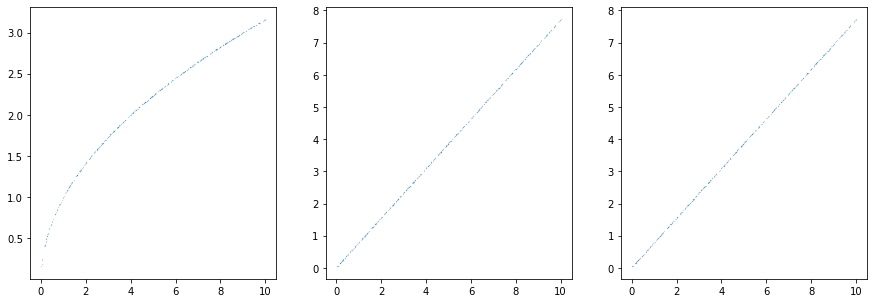

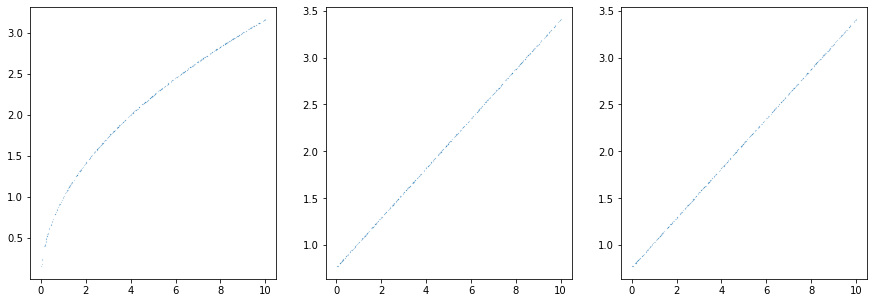

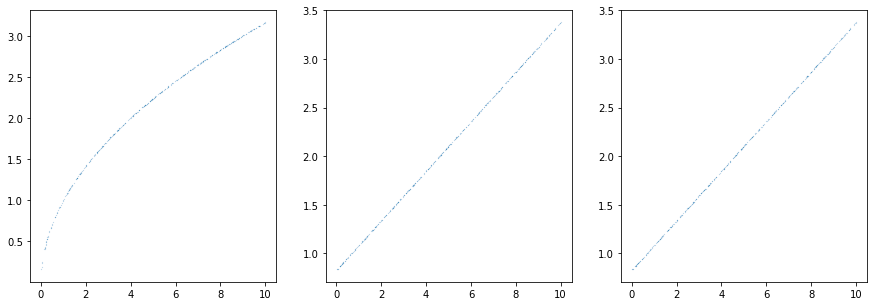

In [27]:
for i in range(epoch):
    model.train()
    optimizer.zero_grad()
    input_x = torch.Tensor(train_x)
    input_x=input_x#.view(-1,1)
    #print(input_x.shape)
    true_y = torch.Tensor(train_y)
    pred_y = model(input_x)
    loss = reg_loss(pred_y.squeeze(), true_y)
    loss.backward()
    optimizer.step()
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())
    
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(val_x)
    true_y = torch.Tensor(val_y)
    pred_y = model(input_x)   
    loss = reg_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    if i%1000 ==0:
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_x)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().numpy() 
        mae = mean_absolute_error(true_y, pred_y) # sklearn 쪽 함수들은 true_y 가 먼저, pred_y가 나중에 인자로 들어가는 것에 주의합시다
        list_mae.append(mae)
        list_mae_epoch.append(i)
        
        fig = plt.figure(figsize=(15,5))
        ax1=fig.add_subplot(1,3,1)
        ax1.scatter(test_x,test_y,s=0.01)
        ax2=fig.add_subplot(1,3,2)
        ax2.scatter(test_x,pred_y,s=0.01)
        ax3=fig.add_subplot(1,3,3)
        #print(train_x.shape,pred_y.shape)
        ax3.scatter(test_x,pred_y,s=0.01)
        plt.show()

# MLP

In [28]:
model1=MLP()
lr = 0.0006
optimizer = optim.SGD(model1.parameters(), lr=lr)
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []

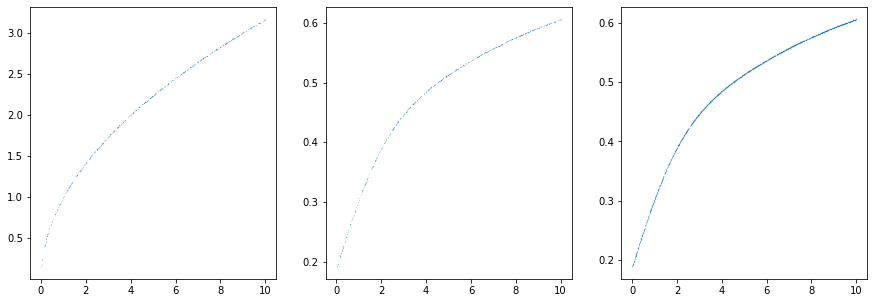

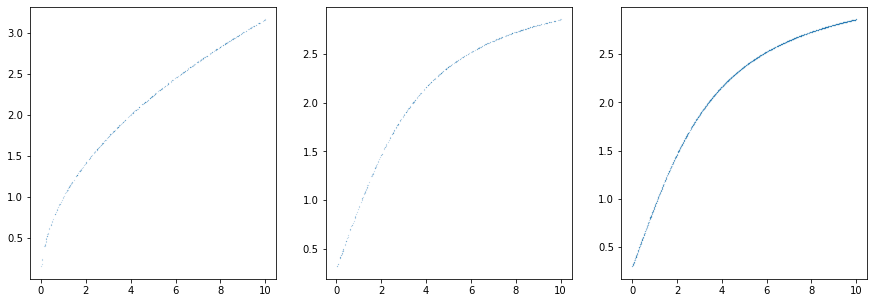

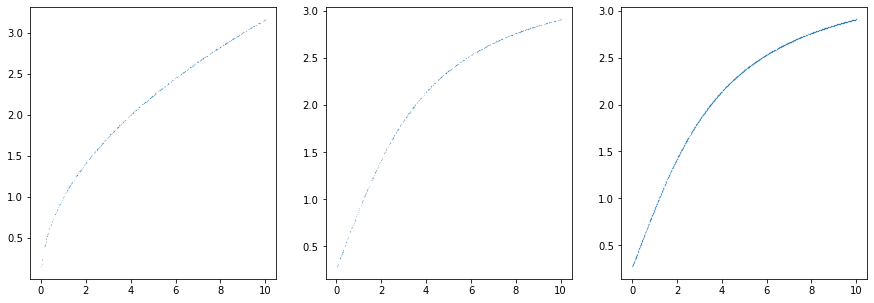

In [29]:
for i in range(epoch):
    model1.train()
    optimizer.zero_grad()
    input_x = torch.Tensor(train_x)
    #input_x=input_x#.view(-1,1)
    #print(input_x.shape)
    true_y = torch.Tensor(train_y)
    pred_y = model1(input_x)
    #print(pred_y,pred_y.shape,true_y)
    #break
    loss = reg_loss(pred_y.squeeze(), true_y)
    loss.backward()
    optimizer.step()
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())
    
    model1.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(val_x)
    true_y = torch.Tensor(val_y)
    pred_y = model1(input_x)   
    loss = reg_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    if i%1000 ==0:
        model1.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_x)
        true_y = torch.Tensor(test_y)
        pred_y = model1(input_x).detach().numpy() 
        mae = mean_absolute_error(true_y, pred_y) # sklearn 쪽 함수들은 true_y 가 먼저, pred_y가 나중에 인자로 들어가는 것에 주의합시다
        list_mae.append(mae)
        list_mae_epoch.append(i)
        
        fig = plt.figure(figsize=(15,5))
        ax1=fig.add_subplot(1,3,1)
        ax1.scatter(test_x,test_y,s=0.01)
        ax2=fig.add_subplot(1,3,2)
        ax2.scatter(test_x,pred_y,s=0.01)
        input_x=torch.Tensor(train_x)
        pred_y=model1(input_x).detach().numpy()
        ax3=fig.add_subplot(1,3,3)
        #print(train_x.shape,pred_y.shape)
        ax3.scatter(train_x,pred_y,s=0.01)
        plt.show()